
# Broker Visualization

Visualizes data from a simulation result broker CSV file.

The csv file must have the following columns: brokerId;latitude;longitude;lcm;leaderId


In [23]:
# imports
import os
import pandas as pd
import seaborn as sns

# vars
dir = "../simulation-result"
filename = "randomResult-200.0-1000-brokers"

# computed vars
input = dir + "/" + filename + ".csv"
output = dir + "/" + filename + ".pdf"
print("Reading file from " + input)
print("Writing file to " + output)

# Configure seaborn
sns.set(rc={'figure.figsize':(20,10)})
print("seaborn configured")


Reading file from ../simulation-result/randomResult-200.0-1000-brokers.csv
Writing file to ../simulation-result/randomResult-200.0-1000-brokers.pdf
seaborn configured


In [28]:
# read in data
df = pd.read_csv(input, sep=";")

# add isLeader column
isMember = (df["brokerId"] != df["leaderId"])
df["isMember"] = isMember

# filter
filtered = df
filtered

,brokerId,latitude,longitude,lcm,leaderId,isMember
0,Broker-0,0.268649,16.706213,475,Broker-841,True
1,Broker-1,34.177863,14.110883,9,Broker-109,True
2,Broker-2,43.254573,-1.839406,50,Broker-758,True
3,Broker-3,28.304531,73.089935,707,Broker-818,True
4,Broker-4,43.567277,27.865650,458,Broker-992,True
...,...,...,...,...,...,...
995,Broker-995,5.309621,46.888481,705,Broker-724,True
996,Broker-996,-1.724649,5.139872,644,Broker-6,True
997,Broker-997,32.752942,36.079525,631,Broker-420,True
998,Broker-998,28.495946,29.265806,693,Broker-109,True


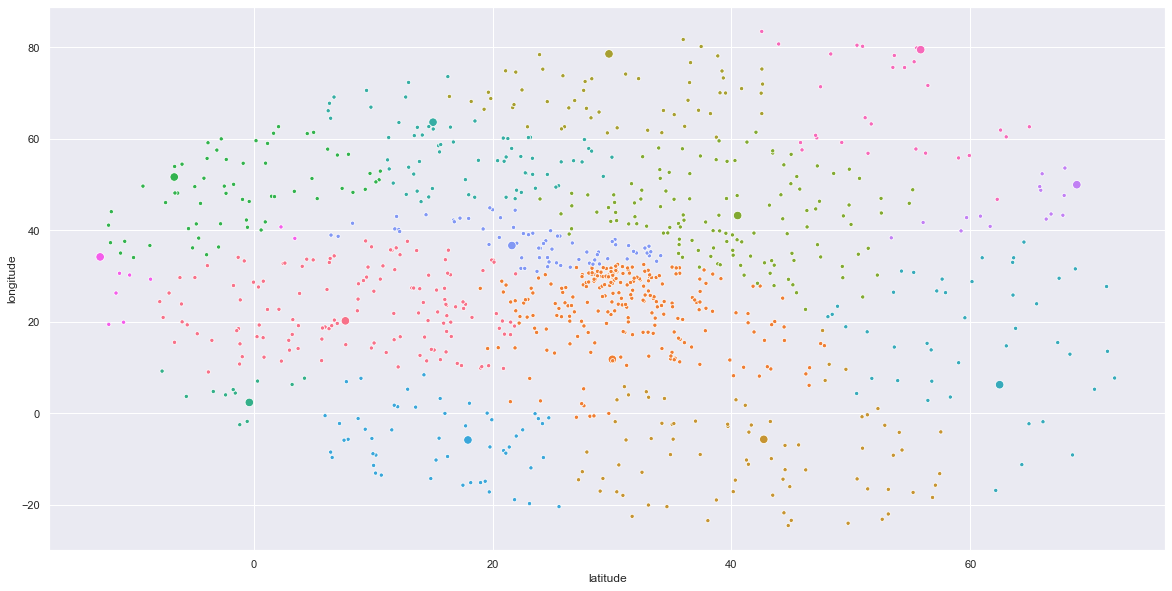

In [29]:
# visualize
ax = sns.scatterplot(x="latitude", y="longitude", hue="leaderId", size="isMember", legend=False, data=filtered)
